# Week 10 handin - by Benjamin S (cph-bs190)

## Assignment

### Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## Status
I have completed all exercises.

# Exercises
### 1 - 3

In [ ]:
pip install sklearn

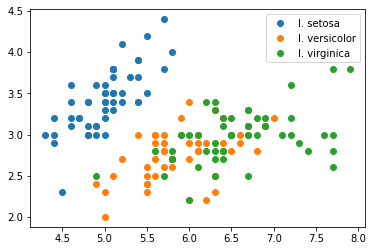

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1
df = pd.read_csv("testfiles/iris_data.csv", decimal=",")
iris_df = df.drop(columns=["Petal length", "Petal width"])

# 2
labels = iris_df["Species"].unique()

# 3
grouped = iris_df.groupby("Species")
for name, group in grouped:
    plt.plot(group["Sepal length"], group["Sepal width"], marker="o", linestyle="", label=name)
    plt.legend()

### 4 - 9

Estimated bandwidth: 0.5782805830511768

 MeanShift(bandwidth=0.5782805830511768, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

MeanShift labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

MeanShift cluster centers:
 [[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]]

Number of clusters: 3


Text(0.5, 1.0, 'Estimated number of clusters: 3')

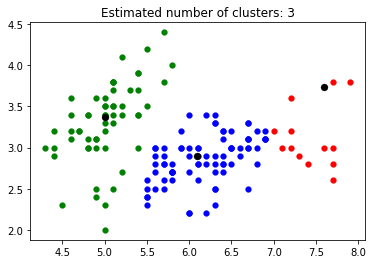

In [2]:
from sklearn.cluster import estimate_bandwidth, MeanShift
from sklearn import preprocessing
from itertools import cycle 
import numpy as np 

# 4
iris_no_species = iris_df.drop(columns="Species")
data_2d = iris_no_species.values

bw = estimate_bandwidth(data_2d, quantile=0.2, n_samples=len(data_2d))
print("Estimated bandwidth:", bw)

ms = MeanShift(bandwidth=bw, bin_seeding=True)
ms.fit(data_2d)
print("\n", ms)

# 5
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))

print("\nMeanShift labels:", labels)
print("\nMeanShift cluster centers:\n", cluster_centers)
print("\nNumber of clusters:", n_clusters)

# 6 - 7

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

# 8
# The second plot has far more clearly separated clusters than the first,
# so we can see a much clearer disparity between the different types of
# Iris flowers on it.

# 9
# Changing the quantile from 0.2 to 0.15 increases the estimated number
# of clusters from 3 to 5, so this indicates that some accuracy can be
# lost by using a quantile value that doesn't fit the dataset (since
# we know that in this case, there should only be 3 clusters, one for
# each species).